In [141]:
# Read result files

import pickle
import os
from collections import Iterable
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
def flatten(lis):
     for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:        
            yield item
            
def find(lst, s):
    return [i for i, x in enumerate(lst) if x==s]

def keys_exists(element, *keys):
    '''
    Check if *keys (nested) exists in `element` (dict).
    '''
    if not isinstance(element, dict):
        raise AttributeError('keys_exists() expects dict as first argument.')
    if len(keys) == 0:
        raise AttributeError('keys_exists() expects at least two arguments, one given.')

    _element = element
    for key in keys:
        try:
            _element = _element[key]
        except KeyError:
            return False
    return True

In [96]:
dataset = 'prison'

In [114]:
results_dict={}

In [133]:
for file in os.listdir('./results_prison'):
    with open(f'./results_prison/{file}', 'rb') as handle:
        flatten_file_name = list(flatten([i.split('.') for i in file.split('_')]))
        idx_dataset_name = find(flatten_file_name, dataset)[0]
        sample = flatten_file_name[idx_dataset_name+1:-1][-1]
        version = flatten_file_name[idx_dataset_name+1:-1][-2]
        transformation = '_'.join(flatten_file_name[idx_dataset_name+1:-1][:-2])
        if not keys_exists(results_dict, transformation):
            print(transformation)
            results_dict[transformation] = {}
        if not keys_exists(results_dict, transformation, version): 
            results_dict[transformation][version] = {}
        if not keys_exists(results_dict, transformation, version, sample):    
            results_dict[transformation][version][sample] = {}

        results_dict[transformation][version][sample] = pickle.load(handle)

In [135]:
# shape=(transformation, version, sample, metric, dim)
# metric = mase, rmse
# dim = bottom, total, state, gender, legal, all

df = pd.DataFrame.from_dict({(i,j, k, l): results_dict[i][j][k][l] 
                           for i in results_dict.keys() 
                           for j in results_dict[i].keys()
                           for k in results_dict[i][j].keys()
                           for l in results_dict[i][j][k].keys()},
                       orient='index')

In [136]:
df

bottom     total    state   gender     legal      all
time_warp v1 s7 mase    2.301     0.998    1.701    0.733     2.872    2.156
                rmse  132.898  1146.560  343.163  614.663  1398.792  245.527
             s1 mase    2.347     1.131    1.793    0.768     2.810    2.212
                rmse  128.483  1293.618  337.850  673.981  1343.964  257.942
             s3 mase    2.312     0.904    1.854    0.624     2.839    2.155
...                       ...       ...      ...      ...       ...      ...
scaling   v0 s2 rmse  138.953  1169.654  375.581  632.213  1285.145  253.476
             s9 mase    2.283     0.795    1.695    0.639     2.640    2.118
                rmse  129.711   918.292  334.032  500.974  1333.788  217.331
             s6 mase    2.304     0.583    1.639    0.501     2.943    2.113
                rmse  133.755   695.965  339.550  384.974  1512.138  196.223

[480 rows x 6 columns]

In [148]:
df.index

MultiIndex([('time_warp', 'v1', 's7', 'mase'),
            ('time_warp', 'v1', 's7', 'rmse'),
            ('time_warp', 'v1', 's1', 'mase'),
            ('time_warp', 'v1', 's1', 'rmse'),
            ('time_warp', 'v1', 's3', 'mase'),
            ('time_warp', 'v1', 's3', 'rmse'),
            ('time_warp', 'v1', 's5', 'mase'),
            ('time_warp', 'v1', 's5', 'rmse'),
            ('time_warp', 'v1', 's9', 'mase'),
            ('time_warp', 'v1', 's9', 'rmse'),
            ...
            (  'scaling', 'v0', 's7', 'mase'),
            (  'scaling', 'v0', 's7', 'rmse'),
            (  'scaling', 'v0', 's8', 'mase'),
            (  'scaling', 'v0', 's8', 'rmse'),
            (  'scaling', 'v0', 's2', 'mase'),
            (  'scaling', 'v0', 's2', 'rmse'),
            (  'scaling', 'v0', 's9', 'mase'),
            (  'scaling', 'v0', 's9', 'rmse'),
            (  'scaling', 'v0', 's6', 'mase'),
            (  'scaling', 'v0', 's6', 'rmse')],
           length=480)

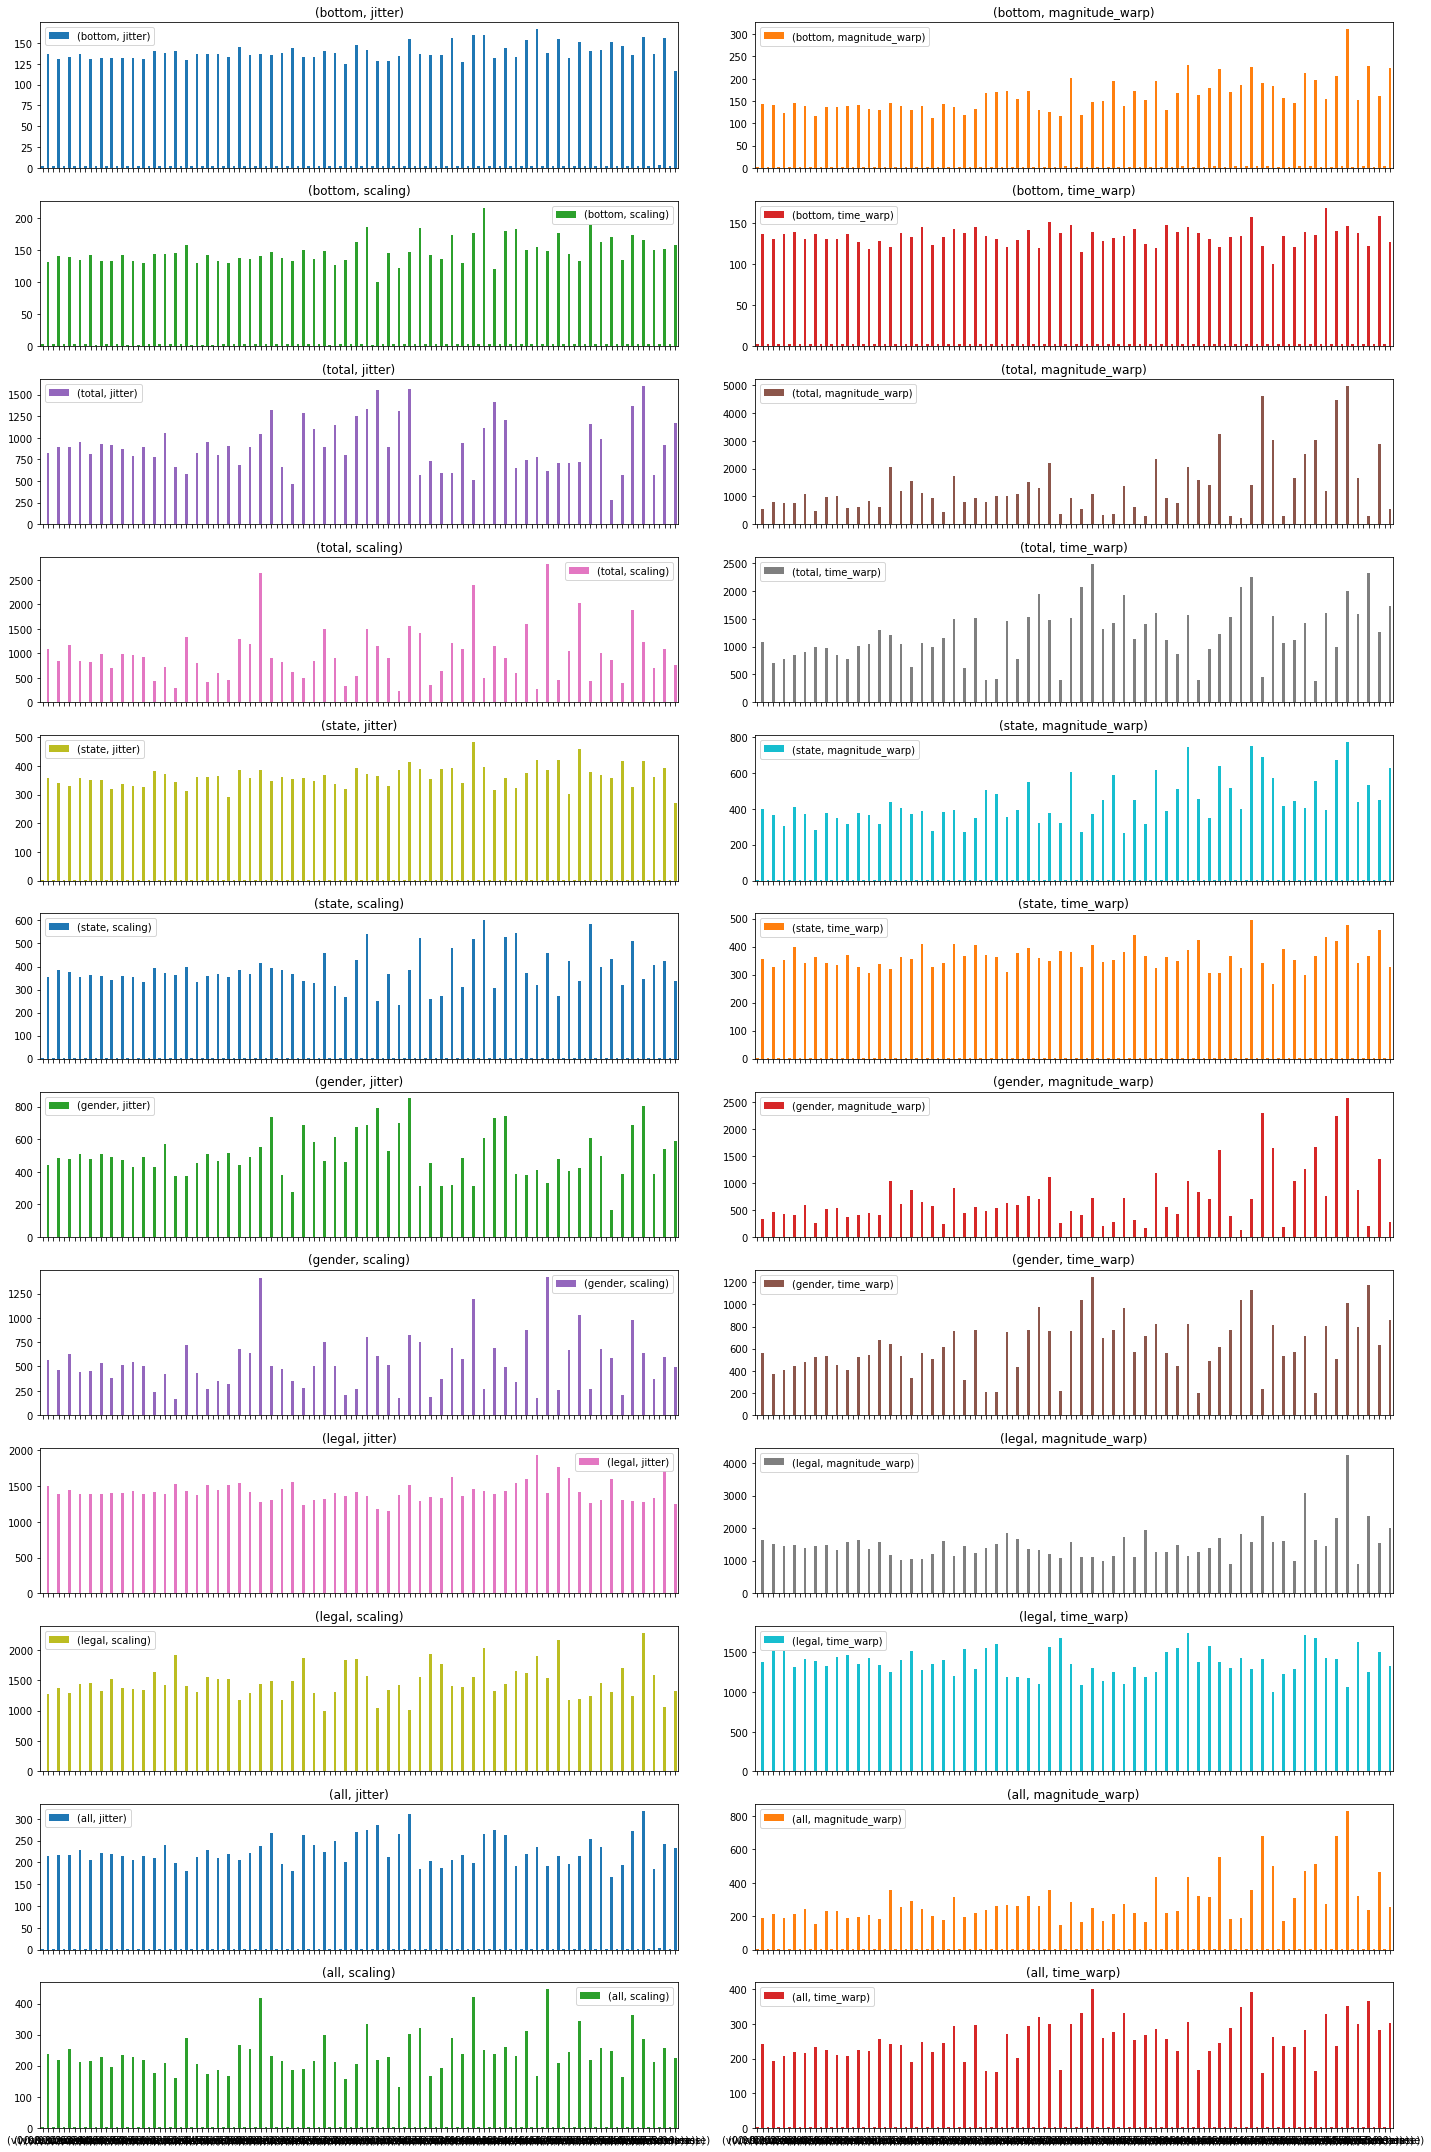

In [145]:
ax = df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(20, 30), layout=(12, 2))
plt.tight_layout()